# Principal Component Analysis

Loading packages needed:

In [13]:
using LinearAlgebra, CSV, Plots
theme(:dark)

Importing the data(reads as DataFrame):

In [14]:
votes = CSV.read("house-votes-84.data");

Cleaning the data from characters to values:

In [15]:
m, n = length(votes[:, 1]), length(votes[1, :])
A₀ = zeros(m, n-1)

for i in 1:m
    for j in 1:n-1
        if votes[i, j+1] == "y"
            A₀[i, j] = 1
        elseif votes[i, j+1] == "n"
            A₀[i, j] = 0
        else
            A₀[i, j] = -1
        end
    end
end

Re-orienting that data:

In [16]:
A₀ = A₀'

16×434 Adjoint{Float64,Array{Float64,2}}:
  0.0  -1.0   0.0   1.0  0.0   0.0   0.0  …   1.0  0.0  0.0   0.0   0.0   0.0
  1.0   1.0   1.0   1.0  1.0   1.0   1.0      0.0  0.0  0.0  -1.0   0.0   1.0
  0.0   1.0   1.0   1.0  1.0   0.0   0.0      1.0  1.0  1.0   0.0   0.0   0.0
  1.0  -1.0   0.0   0.0  0.0   1.0   1.0      0.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0  -1.0   1.0  1.0   1.0   1.0     -1.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0   1.0   1.0  1.0   1.0   1.0  …   0.0  1.0  0.0   1.0   1.0   1.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  0.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  0.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  1.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  1.0  1.0   0.0  -1.0   1.0
  0.0   1.0   1.0   1.0  0.0   0.0   0.0  …   0.0  0.0  0.0   1.0   0.0   0.0
  1.0   0.0   0.0  -1.0  0.0   0.0   0.0      1.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0   1.0   1.

Centering our data:

In [18]:
A = copy(A₀)
for i = 1:size(A)[1]
    # Calculating the mean of the i-th row
    μ = sum(A[i, :]) / size(A)[2]
    
    # Subtract the mean from each entry in the i-th row
    for j = 1:size(A)[2]
        A[i, j] -= μ
    end
end

Defining sample covariance:

In [19]:
S = A*A'/(size(A)[2]-1)

16×16 Array{Float64,2}:
  0.296618     0.0418684    0.118751   …  -0.0686881    0.0765105  0.00663041
  0.0418684    0.445461     0.0221475      0.00606635  -0.0187418  0.018082  
  0.118751     0.0221475    0.29806       -0.129905     0.133002   0.0128245 
 -0.0728228    0.0334713   -0.147817       0.16757     -0.105097   0.0245953 
 -0.0693586    0.0555762   -0.141548       0.187365    -0.122253   0.0229457 
 -0.0827684    0.0497334   -0.0969445  …   0.150605    -0.0934537  0.00866317
  0.093012    -0.0362384    0.162908      -0.111408     0.132353   0.0623024 
  0.105006    -0.0331733    0.192665      -0.130022     0.137727   0.0328434 
  0.0632869   -0.0467322    0.131278      -0.11095      0.110312   0.0579496 
 -0.00893988   6.38563e-5   0.0231373      0.0456572    0.0162301  0.0840668 
  0.0452209    0.0883771    0.0612275  …  -0.0113026    0.0791392  0.0320452 
 -0.0832526   -0.00175605  -0.13512        0.16244     -0.0918253  0.0311193 
 -0.0664904    0.0656762   -0.127117    

Assigning the Singular Value Decomposition:

In [33]:
U, Σ, V = svd(S)

SVD{Float64,Float64,Array{Float64,2}}([-0.175679 -0.041804 … 0.0342649 0.00237117; 0.0612061 -0.0891797 … 0.0175909 -0.0460103; … ; -0.245464 -0.107372 … -0.0151434 -0.0478005; -0.00279055 -0.900146 … -0.0118164 0.0156987], [1.80976, 0.791685, 0.53318, 0.383759, 0.294774, 0.25659, 0.247908, 0.221132, 0.203696, 0.170044, 0.159847, 0.147107, 0.134246, 0.112725, 0.0844937, 0.0699569], [-0.175679 0.0612061 … -0.245464 -0.00279055; -0.041804 -0.0891797 … -0.107372 -0.900146; … ; 0.0342649 0.0175909 … -0.0151434 -0.0118164; 0.00237117 -0.0460103 … -0.0478005 0.0156987])

Plotting our data:

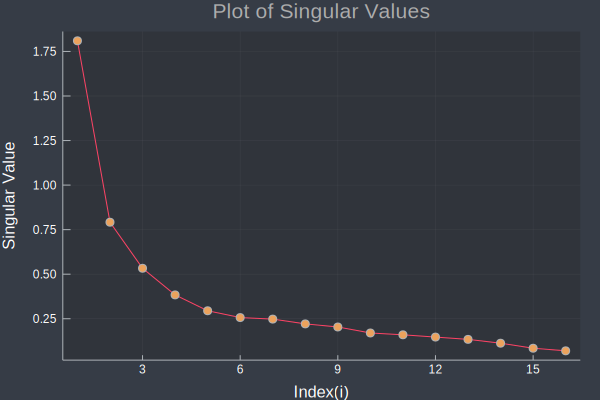

In [34]:
plot(Σ, legend = false)
scatter!(Σ, 
    xaxis = "Index(i)", 
    yaxis = "Singular Value", 
    title = "Plot of Singular Values")

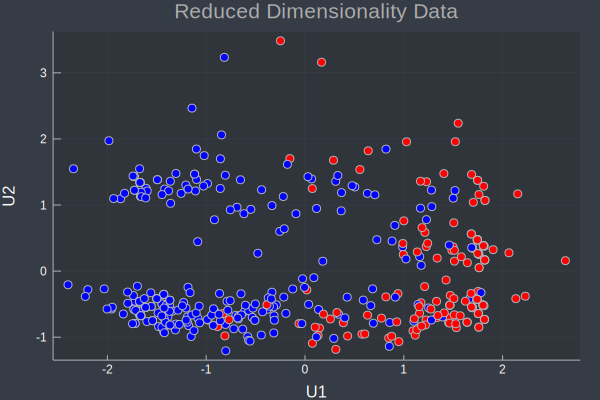

In [35]:
U_reduced = U[:, 1:2]

scatter(legend=false, title = "Reduced Dimensionality Data", xaxis = "U1", yaxis = "U2")

for i = 1:size(A)[2]
    p = U_reduced'*A[:, i]
    party = votes[i, 1] == "democrat" ? "blue" : "red"
    scatter!([(p[1], p[2])], color = party)
end
scatter!()